# Insurance Claim Prediction

In [1]:
# import python packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
# %matplotlib inline
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Output all results from notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Read the data
dftrain = pd.read_csv('../train.csv')

# View the first 5 entries and check if they are correct
dftrain.head()

id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6     cont7  \
0   1    A    B    A    B    A    A    A    A    B  ...  0.718367  0.335060   
1   2    A    B    A    A    A    A    A    A    B  ...  0.438917  0.436585   
2   5    A    B    A    A    B    A    A    A    B  ...  0.289648  0.315545   
3  10    B    B    A    B    A    A    A    A    B  ...  0.440945  0.391128   
4  11    A    B    A    B    A    A    A    A    B  ...  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85  

[5 rows x 132 columns]

In [3]:
# Drop the id column
dftrain = dftrain.drop(columns=['id'])

dftrain.head()

cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10  ...     cont6     cont7  \
0    A    B    A    B    A    A    A    A    B     A  ...  0.718367  0.335060   
1    A    B    A    A    A    A    A    A    B     B  ...  0.438917  0.436585   
2    A    B    A    A    B    A    A    A    B     B  ...  0.289648  0.315545   
3    B    B    A    B    A    A    A    A    B     A  ...  0.440945  0.391128   
4    A    B    A    B    A    A    A    A    B     B  ...  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85  

[5 rows x 131 columns]

Text(0.5, 1.0, 'Histogram of claim loss (before outlier removal)')

Text(0.5, 0, 'Loss')

Text(0, 0.5, 'Frequency')

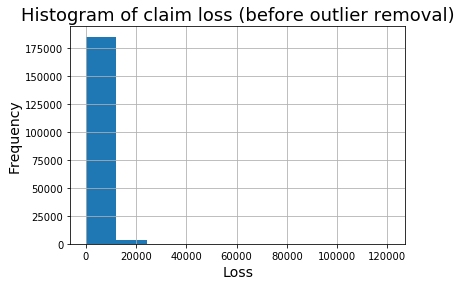

In [4]:
# Plot histogram to have a better understanding on the outliers
dfLoss = dftrain.loss
dfLoss.hist()
plt.title("Histogram of claim loss (before outlier removal)",fontsize=18)
plt.xlabel("Loss",fontsize=14)
plt.ylabel("Frequency",fontsize=14)

We can see some extreme cases. We should remove values more or less than 2 std

In [5]:
# keep only the ones that are within +2 to -2 standard deviations in the column 'Loss'.
std_loss = dftrain.loss.std()
mean_loss = dftrain.loss.mean()
dftrainC = dftrain[np.abs(dftrain.loss-mean_loss) <= (2*std_loss)]
dftrainC = dftrainC[~(np.abs(dftrainC.loss-mean_loss) > (2*std_loss))]

# Plot histogram again
dfLoss = dftrainC.loss
dfLoss.hist()
plt.title("Histogram of claim loss (after outlier removal)",fontsize=18)
plt.xlabel("Loss",fontsize=14)
plt.ylabel("Frequency",fontsize=14)

Text(0.5, 1.0, 'Histogram of claim loss (after outlier removal)')

Text(0.5, 0, 'Loss')

Text(0, 0.5, 'Frequency')

In [6]:
# Drop rows with Nan values
dftrainC = dftrainC.dropna()

# View some basic statistical details like percentile, mean, std etc. of a data frame with numeric values.
dftrainC.describe()

cont1          cont2          cont3          cont4  \
count  179829.000000  179829.000000  179829.000000  179829.000000   
mean        0.493907       0.501514       0.494916       0.492948   
std         0.187495       0.207863       0.201173       0.211370   
min         0.000016       0.001149       0.002634       0.176921   
25%         0.344779       0.358319       0.336963       0.327354   
50%         0.475784       0.488789       0.506105       0.452887   
75%         0.625272       0.681761       0.634224       0.661283   
max         0.984975       0.862654       0.944251       0.954297   

               cont5          cont6          cont7          cont8  \
count  179829.000000  179829.000000  179829.000000  179829.000000   
mean        0.487791       0.489068       0.480980       0.485345   
std         0.208956       0.205066       0.175929       0.199264   
min         0.281143       0.012683       0.069503       0.236880   
25%         0.281143       0.334009       0.350175       0.312800   
50%         0.422268       0.439206       0.435614       0.435180   
75%         0.643315       0.652626       0.589494       0.617950   
max         0.982520       0.997162       1.000000       0.980200   

               cont9         cont10         cont11         cont12  \
count  179829.000000  179829.000000  179829.000000  179829.000000   
mean        0.484858       0.496865       0.489473       0.489179   
std         0.181501       0.186232       0.208407       0.208072   
min         0.000080       0.000000       0.035321       0.036232   
25%         0.358970       0.364580       0.307628       0.305148   
50%         0.437310       0.461190       0.453334       0.462286   
75%         0.566820       0.614590       0.672085       0.665644   
max         0.995400       0.994980       0.998742       0.998484   

              cont13         cont14           loss  
count  179829.000000  179829.000000  179829.000000  
mean        0.493030       0.495083    2593.962220  
std         0.212480       0.222008    1866.113078  
min         0.000228       0.179722       0.670000  
25%         0.315758       0.294839    1170.460000  
50%         0.363547       0.406707    2016.560000  
75%         0.689974       0.724461    3521.030000  
max         0.988494       0.844848    8845.010000

In [7]:
# Encode categorical features
le = preprocessing.LabelEncoder()
dftrainC.head()

# Fit the encoder to the pandas column
le.fit(dftrainC['cat1'].values)

# View the labels (if you want)
list(le.classes_)

# Apply the fitted encoder to the pandas column
cat1 = le.transform(dftrainC['cat1'])
s = pd.Series(cat1, dtype='int64')

# s.head()

# Convert cat1 data from characters to integers
dftrainC['cat1'] = s.values
dftrainC.head()

cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10  ...     cont6     cont7  \
0    A    B    A    B    A    A    A    A    B     A  ...  0.718367  0.335060   
1    A    B    A    A    A    A    A    A    B     B  ...  0.438917  0.436585   
2    A    B    A    A    B    A    A    A    B     B  ...  0.289648  0.315545   
3    B    B    A    B    A    A    A    A    B     A  ...  0.440945  0.391128   
4    A    B    A    B    A    A    A    A    B     B  ...  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85  

[5 rows x 131 columns]

LabelEncoder()

['A', 'B']

cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10  ...     cont6  \
0     0    B    A    B    A    A    A    A    B     A  ...  0.718367   
1     0    B    A    A    A    A    A    A    B     B  ...  0.438917   
2     0    B    A    A    B    A    A    A    B     B  ...  0.289648   
3     1    B    A    B    A    A    A    A    B     A  ...  0.440945   
4     0    B    A    B    A    A    A    A    B     B  ...  0.178193   

      cont7    cont8    cont9   cont10    cont11    cont12    cont13  \
0  0.335060  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493   
1  0.436585  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431   
2  0.315545  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709   
3  0.391128  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077   
4  0.247408  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011   

     cont14     loss  
0  0.714843  2213.18  
1  0.304496  1283.60  
2  0.774425  3005.09  
3  0.602642   939.85  
4  0.432606  2763.85  

[5 rows x 131 columns]

Let's do this for all the categorical columns

In [8]:
# Define a class to label encode multiples columns
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = preprocessing.LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = preprocessing.LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [9]:
# Get all categorical column names
col_lst = list(dftrainC.columns.values)

# Slice list to get only categorical columns
col_lst = col_lst[1:116]

encodeddf = MultiColumnLabelEncoder(columns = col_lst).fit_transform(dftrainC)

# Check everything was encoded
encodeddf.head()

cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  cat10  ...     cont6  \
0     0     1     0     1     0     0     0     0     1      0  ...  0.718367   
1     0     1     0     0     0     0     0     0     1      1  ...  0.438917   
2     0     1     0     0     1     0     0     0     1      1  ...  0.289648   
3     1     1     0     1     0     0     0     0     1      0  ...  0.440945   
4     0     1     0     1     0     0     0     0     1      1  ...  0.178193   

      cont7    cont8    cont9   cont10    cont11    cont12    cont13  \
0  0.335060  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493   
1  0.436585  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431   
2  0.315545  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709   
3  0.391128  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077   
4  0.247408  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011   

     cont14     loss  
0  0.714843  2213.18  
1  0.304496  1283.60  
2  0.774425  3005.09  
3  0.602642   939.85  
4  0.432606  2763.85  

[5 rows x 131 columns]

We should split our dataset into train and test

In [10]:
# Split the target variable and features
y = encodeddf.loss
X = encodeddf.drop('loss',1)

# View our dataframes
dftrain.head()
X.head()
y.head()

cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10  ...     cont6     cont7  \
0    A    B    A    B    A    A    A    A    B     A  ...  0.718367  0.335060   
1    A    B    A    A    A    A    A    A    B     B  ...  0.438917  0.436585   
2    A    B    A    A    B    A    A    A    B     B  ...  0.289648  0.315545   
3    B    B    A    B    A    A    A    A    B     A  ...  0.440945  0.391128   
4    A    B    A    B    A    A    A    A    B     B  ...  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85  

[5 rows x 131 columns]

cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  cat10  ...     cont5  \
0     0     1     0     1     0     0     0     0     1      0  ...  0.310061   
1     0     1     0     0     0     0     0     0     1      1  ...  0.885834   
2     0     1     0     0     1     0     0     0     1      1  ...  0.397069   
3     1     1     0     1     0     0     0     0     1      0  ...  0.422268   
4     0     1     0     1     0     0     0     0     1      1  ...  0.704268   

      cont6     cont7    cont8    cont9   cont10    cont11    cont12  \
0  0.718367  0.335060  0.30260  0.67135  0.83510  0.569745  0.594646   
1  0.438917  0.436585  0.60087  0.35127  0.43919  0.338312  0.366307   
2  0.289648  0.315545  0.27320  0.26076  0.32446  0.381398  0.373424   
3  0.440945  0.391128  0.31796  0.32128  0.44467  0.327915  0.321570   
4  0.178193  0.247408  0.24564  0.22089  0.21230  0.204687  0.202213   

     cont13    cont14  
0  0.822493  0.714843  
1  0.611431  0.304496  
2  0.195709  0.774425  
3  0.605077  0.602642  
4  0.246011  0.432606  

[5 rows x 130 columns]

0    2213.18
1    1283.60
2    3005.09
3     939.85
4    2763.85
Name: loss, dtype: float64

In [11]:
# Split to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


Check linear regression

In [12]:
# Fit a linear regression model
reg = LinearRegression().fit(X_train, y_train)
reg.score(X, y)

reg.coef_

reg.intercept_

y_pred = reg.predict(X_test)

0.4475698887972304

array([-3.32890327e+02,  2.83017229e+02,  2.13412497e+02, -2.87642592e+01,
        7.48892154e+01, -3.38997532e+02,  3.82772994e+02,  8.34759676e+01,
        8.82893611e+01,  2.50568316e+02,  1.56265613e+02,  7.58858406e+02,
        1.49802582e+02,  7.52417870e+01, -5.42749435e+02,  7.29387127e+01,
        1.60913693e+01,  4.46434828e+01,  3.09631799e+02, -1.72874218e+01,
       -3.20779147e+02, -2.00199777e+02,  2.25960410e+02, -6.74465870e+00,
        3.24476009e+02,  5.66619390e+02,  3.50860506e+02,  1.12496057e+02,
        2.65641303e+02, -7.76221229e-01, -3.55933523e+01,  5.44207915e+02,
        7.51953871e+01,  4.32511647e+02,  4.92701617e+02, -3.93473366e+03,
       -3.78710326e+03, -3.66013080e+03, -4.11283092e+03, -4.08361034e+03,
       -4.11664551e+03, -3.65274869e+03, -4.01819002e+03, -3.53073087e+03,
       -3.94718009e+03, -3.82050655e+03, -3.74761519e+03, -3.61277046e+03,
        3.88125394e+02,  3.22262213e+02,  5.30164959e+02,  3.19195164e+02,
        7.70784951e+02,  

24.65894084859974

In [13]:
# Check the metrics for linear regression
# Accuracy of the model using all features
mse = metrics.mean_squared_error(y_test, y_pred)
rsquared = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
    
print('Mean squared error = '+str(mse))
print('Mean absolute error = '+str(mae))
print('R squared = '+str(rsquared))

Mean squared error = 1924454.4342954184
Mean absolute error = 1035.1205028366408
R squared = 0.4412543435042918


['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss']


(<Figure size 1152x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11fc23390>)

(15.0, 0.0)

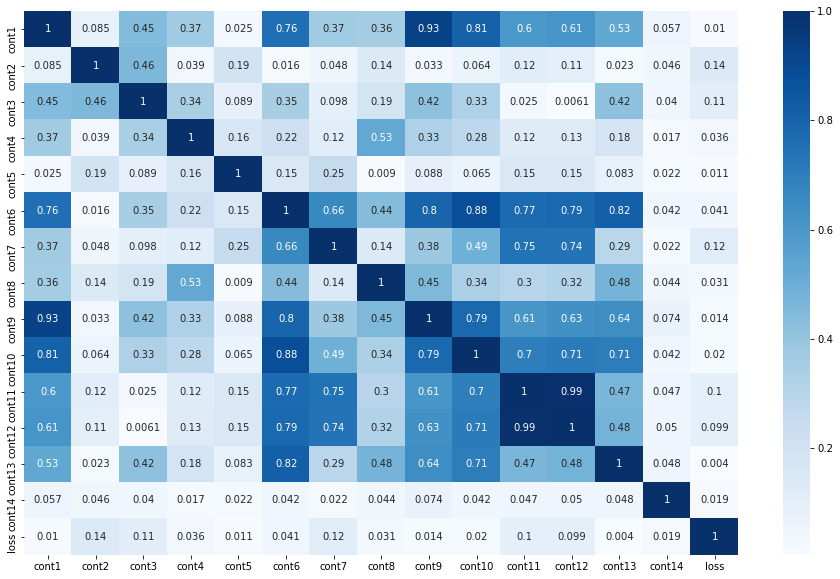

In [14]:
# Explore correlation between our features

contFeatureslist = []
for colName,x in dftrain.iloc[1,:].iteritems():
    #print(x)
    if(not str(x).isalpha()):
        contFeatureslist.append(colName)
        
        
print(contFeatureslist)

# Corr function is used to find the pairwise correlation of all columns in the dataframe using ‘Pearson’ method
correlationMatrix = dftrain[contFeatureslist].corr().abs()

plt.subplots(figsize=(16, 10))
sns.heatmap(correlationMatrix,annot=True,cmap="Blues")

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!
plt.show()

Some features are correlated. Let's remove the highly correlated features.

In [15]:
# Split the target variable and features
y1 = encodeddf.loss
X1 = encodeddf.drop('loss',1)

# Remove highly correlated features
X1 = X1.drop('cont11',1)

# Split to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25)

# Fit a linear regression model
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Check the metrics for linear regression
# Accuracy of the model using all features
mse = metrics.mean_squared_error(y_test, y_pred)
rsquared = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
    
print('Mean squared error = '+str(mse))
print('Mean absolute error = '+str(mae))
print('R squared = '+str(rsquared))

Mean squared error = 1917143.7241326605
Mean absolute error = 1033.4016754051697
R squared = 0.44843947650527105


Removing cont11 make r^2 worse. We can use Partial Least Squares Regression (PLS) or Principal Components Analysis, regression methods that cut the number of predictors to a smaller set of uncorrelated components. 

OR

We should use a Random Forest which decorrelates features.

In [16]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 50, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 2 fold cross validation,
# search across 50 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
y_pred3 = rf_random.predict(X_test)

{'n_estimators': [5, 16, 27, 38, 50], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 14.4min finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


Text(0.5, 1.0, 'Random Forest Regressor')

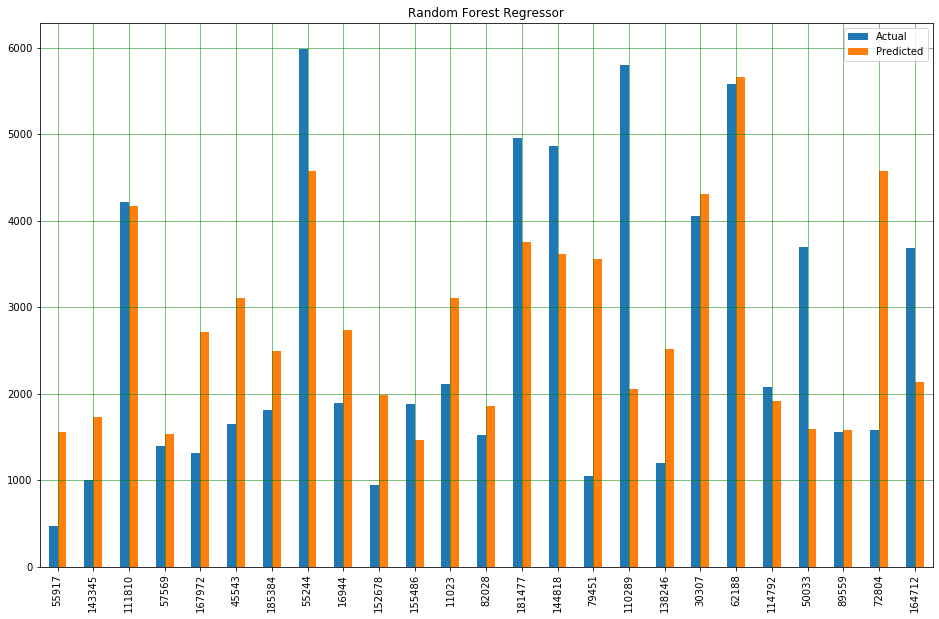

Mean Squared Error (RF): 1823029.2962109097
Mean Absolute Error (RF): 1008.8327093596835
R squared (RF): 0.47551611269039196


In [17]:
# Visualise the result using bar chart
df_vis = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
df1 = df_vis.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Random Forest Regressor")
plt.show()

# Calculate validation values
print('Mean Squared Error (RF):', metrics.mean_squared_error(y_test, y_pred3))
print('Mean Absolute Error (RF):', metrics.mean_absolute_error(y_test, y_pred3))
print('R squared (RF): ' + str(rf_random.score(X_test, y_test))) #Good metric for linear regression

In [18]:
# Random forest is able to provide importance of every feature
importances = rf_random.best_estimator_.feature_importances_
for x,y in zip(X_train.columns.values,importances):
    print("The importance of feature "+str(x)+ " is "+ str(round(y*100,3))+ "%")

The importance of feature cat1 is 2.145%
The importance of feature cat2 is 0.852%
The importance of feature cat3 is 0.416%
The importance of feature cat4 is 0.446%
The importance of feature cat5 is 0.62%
The importance of feature cat6 is 0.362%
The importance of feature cat7 is 0.442%
The importance of feature cat8 is 0.17%
The importance of feature cat9 is 1.04%
The importance of feature cat10 is 2.357%
The importance of feature cat11 is 0.517%
The importance of feature cat12 is 3.868%
The importance of feature cat13 is 0.987%
The importance of feature cat14 is 0.038%
The importance of feature cat15 is 0.0%
The importance of feature cat16 is 0.615%
The importance of feature cat17 is 0.02%
The importance of feature cat18 is 0.016%
The importance of feature cat19 is 0.03%
The importance of feature cat20 is 0.003%
The importance of feature cat21 is 0.014%
The importance of feature cat22 is 0.001%
The importance of feature cat23 is 0.519%
The importance of feature cat24 is 0.072%
The impo

Text(0.5, 1.0, 'Violin plot')

Text(0.5, 0, 'Continuous variable')

Text(0, 0.5, 'Value')

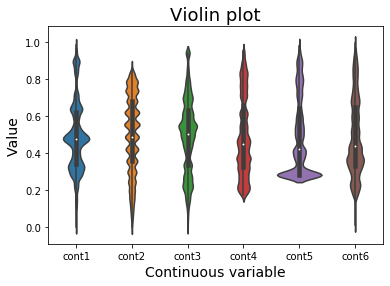

In [19]:
# Visualise continuous data

plt.title("Violin plot",fontsize=18)
plt.xlabel("Continuous variable",fontsize=14)
plt.ylabel("Value",fontsize=14)
sns.violinplot(data=encodeddf[['cont1','cont2','cont3','cont4','cont5','cont6']])

In [20]:
# Visualise categorical data

plt.title("Violin plot",fontsize=18)
plt.xlabel("Categorical variable",fontsize=14)
plt.ylabel("Label value",fontsize=14)
sns.violinplot(data=encodeddf[['cat1','cat2','cat12','cat80','cat81','cat87']])

Text(0.5, 1.0, 'Violin plot')

Text(0.5, 0, 'Categorical variable')

Text(0, 0.5, 'Label value')

Violin plots are similar to box plots, except that they also show the probability density of the data at different values. Here we plot both continuous and categorical values after checking their importance on the final model. We can see that Cont1 has many values near 0.5 while cont2 shows a pattern of spikes at certain values.

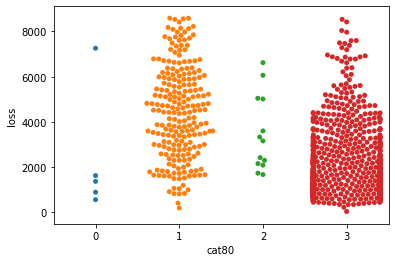

In [21]:
sns.swarmplot(x="cat80", y="loss", data=encodeddf.head(1000))

We explore the relationship of category 80 against the loss of the claim to identify a pattern. We can deduce that loss for label 0 can be significantly lower than labels 1, which is well distributed and label 3.

Perform unsupervised machine learning on the data to identify any clusters in our dataset

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Distortion')

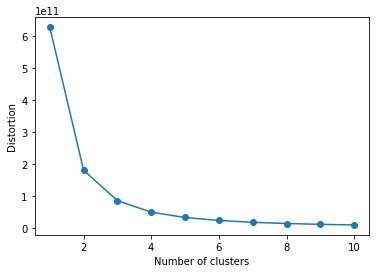

In [22]:
X = encodeddf

# calculate distortion for a range of number of cluster in order to identify the number of clusters
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km_res = km.fit(X)
    distortions.append(km_res.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [23]:
# 3 clusters were chosen
# perform kmeans clustering
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

Text(0.5, 1.0, '3-Cluster KMeans (after PCA-2d)')

Text(0.5, 0, 'Arbitrary')

Text(0, 0.5, 'Arbitrary')

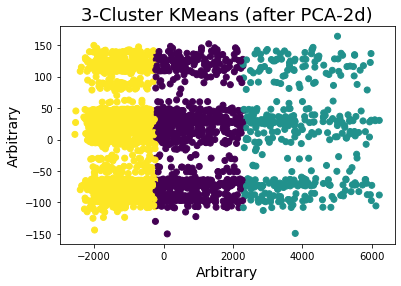

In [24]:
# Visualise the results in 2-D by performing a dimensionality reduction using Principal Component Analysis (PCA)
pca = PCA(n_components=2)
PX = pca.fit_transform(X)

# Choose only the first 3000 entries for visualisation purposes
TX = np.transpose(PX[:3000])

# Produce a scatterplot
plt.scatter(TX[0],TX[1],c=y_km[:3000])
plt.title("3-Cluster KMeans (after PCA-2d)",fontsize=18)
plt.xlabel("Arbitrary",fontsize=14)
plt.ylabel("Arbitrary",fontsize=14)

In [25]:
# Visualise the results in 3-D by performing a dimensionality reduction using Principal Component Analysis (PCA)
pca = PCA(n_components=3)
PX = pca.fit_transform(X)

TX = np.transpose(PX[:3000])

fig = plt.figure(figsize=(20,10))

# Initialise a 3d projection
ax = fig.add_subplot(111, projection='3d')

ax.scatter(TX[0],TX[1],TX[2], marker="o", c=y_km[:3000], s=40)
ax.set_title("3-Cluster KMeans (after PCA-3d)",fontsize=18)
ax.set_xlabel("Arbitrary",fontsize=14)
ax.set_ylabel("Arbitrary",fontsize=14)
ax.set_zlabel("Arbitrary",fontsize=14)
plt.tight_layout()
ax.view_init(10, 95)

Text(0.5, 0.92, '3-Cluster KMeans (after PCA-3d)')

Text(0.5, 0, 'Arbitrary')

Text(0.5, 0, 'Arbitrary')

Text(0.5, 0, 'Arbitrary')

## Future work

- Use one-hot encoding instead of label encoding
- Use Neural Networks using structure and unstructure data